In [9]:
!pip install pandas
!pip install scikit-learn
#import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [11]:

df = pd.read_csv('IAD - Copy.csv')

In [13]:
df.head()

,Time,Origin,Dest,Carrier,Delayed,DepDelayMinutes,Temperature,Wind_Speed
0,05-01-2021 06:00,IAD,DTW,Endeavor Air Inc.,False,0.0,38.0,3.45
1,06-01-2021 06:00,IAD,DTW,Endeavor Air Inc.,False,0.0,38.0,8.06
2,07-01-2021 06:00,IAD,DTW,Endeavor Air Inc.,False,0.0,33.0,9.21
3,08-01-2021 06:00,IAD,DTW,Endeavor Air Inc.,False,0.0,30.9,3.45
4,09-01-2021 06:00,IAD,DTW,Endeavor Air Inc.,False,0.0,30.9,10.36


In [15]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.shape

In [17]:
df.describe()

,DepDelayMinutes,Temperature,Wind_Speed
count,176504.000000,180027.000000,180027.000000
mean,16.343743,60.881939,7.640254
std,58.500333,17.269907,5.265564
min,0.000000,7.000000,0.000000
25%,0.000000,47.000000,4.600000
50%,0.000000,62.000000,6.900000
75%,7.000000,75.000000,10.360000
max,2236.000000,99.000000,73.650000


In [ ]:
df.info()

In [19]:
df = df.fillna(0)

In [21]:
df.isnull().sum()

Time               0
Origin             0
Dest               0
Carrier            0
Delayed            0
DepDelayMinutes    0
Temperature        0
Wind_Speed         0
dtype: int64

In [23]:
df=df.dropna()

In [25]:
df.isnull().sum()

Time               0
Origin             0
Dest               0
Carrier            0
Delayed            0
DepDelayMinutes    0
Temperature        0
Wind_Speed         0
dtype: int64

In [27]:
df

,Time,Origin,Dest,Carrier,Delayed,DepDelayMinutes,Temperature,Wind_Speed
0,05-01-2021 06:00,IAD,DTW,Endeavor Air Inc.,False,0.0,38.0,3.45
1,06-01-2021 06:00,IAD,DTW,Endeavor Air Inc.,False,0.0,38.0,8.06
2,07-01-2021 06:00,IAD,DTW,Endeavor Air Inc.,False,0.0,33.0,9.21
3,08-01-2021 06:00,IAD,DTW,Endeavor Air Inc.,False,0.0,30.9,3.45
4,09-01-2021 06:00,IAD,DTW,Endeavor Air Inc.,False,0.0,30.9,10.36
...,...,...,...,...,...,...,...,...
180022,01-09-2023 22:00,IAD,PIT,Republic Airline,False,0.0,69.0,3.45
180023,01-09-2023 17:00,IAD,CHS,Republic Airline,True,15.0,82.0,6.90
180024,01-09-2023 08:00,IAD,CMH,Republic Airline,False,0.0,64.0,6.90
180025,01-09-2023 18:00,IAD,PWM,Republic Airline,True,12.0,81.0,8.06


In [29]:
#!pip install matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

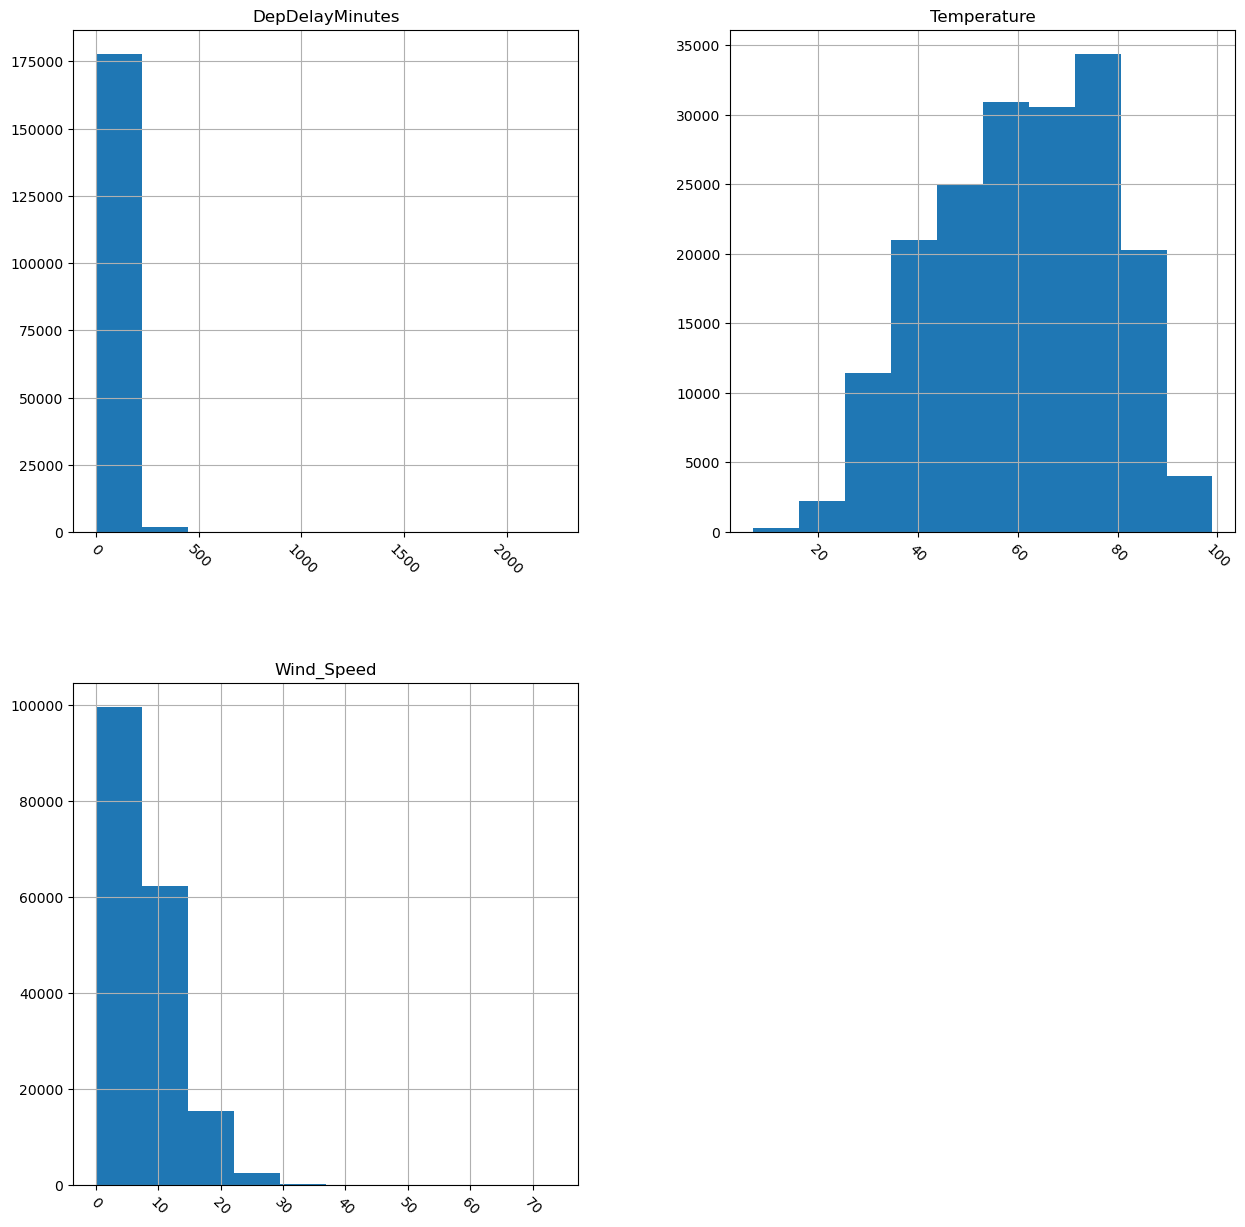

In [30]:

df.hist(figsize=(15,15), xrot=-45, bins=10) 

plt.show()

In [39]:
df=df.drop(["Time"],axis=1)

KeyError: "['Time'] not found in axis"

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [ ]:
df['Origin'] = le.fit_transform(df['Origin'].values.reshape(-1,1).ravel())
df

In [ ]:
df['Dest'] = le.fit_transform(df['Dest'].values.reshape(-1,1).ravel())
df

In [ ]:
df['Carrier'] = le.fit_transform(df['Carrier'].values.reshape(-1,1).ravel())
df

In [ ]:
df['Delayed'] = le.fit_transform(df['Delayed'].values.reshape(-1,1).ravel())
df

In [ ]:
x = df[['Origin', 'Dest','Carrier', 'Temperature','Wind_Speed']]
y = df[['DepDelayMinutes']]


In [ ]:
df['Delayed'].hist(bins=10)
plt.title("flight Delay")
plt.xlabel('Delay')
plt.ylabel('No.of data')

In [ ]:
df['DepDelayMinutes'].hist(bins=10)
plt.title("DepDelayMinutes")
plt.xlabel('Delay')
plt.ylabel('No.of data')

In [ ]:
x

In [ ]:
y.value_counts()

In [ ]:
import pandas as pd 
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=18) # 70% training and 30% test


In [ ]:
#!pip install xgboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [ ]:
# XGBRegressor Model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)
print(f"XGBRegressor R^2 Score: {r2_score(y_test, y_pred_xgb)}")
print(f"XGBRegressor MSE: {mean_squared_error(y_test, y_pred_xgb)}")

In [ ]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)
print(f"Linear Regression R^2 Score: {r2_score(y_test, y_pred_lr)}")
print(f"Linear Regression MSE: {mean_squared_error(y_test, y_pred_lr)}")

In [ ]:
import pickle
pickle.dump(lr_model, open('lr_model.pkl','wb'))


In [ ]:
import pickle
pickle.dump(xgb_model, open('modelxg_check.pkl','wb'))


# 